In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')


In [3]:
features= np.array(data.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [4]:
labels= data.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)
#0

In [6]:
ml = svm.SVC(kernel='linear') 

ml.fit(x_train, y_train)

y_pred = ml.predict(features)

C:\Users\JYOTIKA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [8]:
x1_train, x1_test, y1_train, y1_test = train_test_split(features, y_pred, test_size=0.3, random_state=0, shuffle=True)

In [9]:
model = LGBMClassifier().fit(x1_train, y1_train)
train_acc = model.score(x1_train, y1_train)
    
y1_pred = model.predict(features)
#test_acc = accuracy_score(y_test, y_pred)

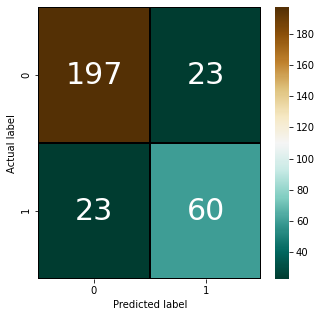

In [10]:


from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels, y1_pred)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=1,cmap='BrBG_r',linecolor="black",fmt=".0f",ax=ax,annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.8481848184818482
Sensitivity for the hybrid model: 0.8954545454545455
Specificity for the hybrid model: 0.7228915662650602
Precision for the hybrid model: 0.8954545454545455
